In [2]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import numpy as np

In [36]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
model1 = DBSCAN(eps=0.05, min_samples=5)
model1.fit(X)

DBSCAN(eps=0.05)

In [37]:
model2 = DBSCAN(eps=0.2, min_samples=5)
model2.fit(X)

DBSCAN(eps=0.2)

In [5]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

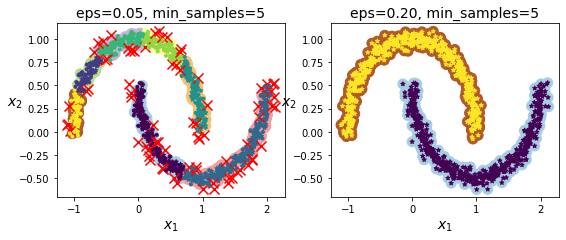

In [39]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(model1, X, size=100)


plt.subplot(122)
plot_dbscan(model2, X, size=100)

plt.show()

In [34]:
print (f'model1 labels: {model1.labels_[:20]}')
print (f'model1 core_sample_indices: {model1.core_sample_indices_[:20]}')
print (f'models1 components_: {model1.components_[:20]}')

model1 labels: [ 0  2 -1 -1  1  0  0  0  2  5  2  3  0  2  2  2  4  2  2  4]
model1 core_sample_indices: [ 0  4  5  6  7  8 10 11 12 13 14 16 17 18 19 20 21 22 23 24]
models1 components_: [[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 [ 0.29248724 -0.20696309]
 [-0.02637836  0.44766267]
 [ 1.6201408  -0.28758856]
 [ 1.26718285 -0.40793471]
 [ 0.87418608  0.50781041]
 [ 0.3322007  -0.19032202]
 [ 1.952812    0.22552333]
 [ 1.9797373   0.0831513 ]
 [-0.20280226  1.02277576]
 [ 1.7895881  -0.16231967]
 [ 1.0280974  -0.4830331 ]
 [-0.41546771  0.93423658]
 [ 0.00346747  0.17635817]
 [ 0.48310182  0.95150758]
 [-0.64419537  0.72552881]
 [-0.00995689  0.3510225 ]
 [ 0.19155835  0.92838729]]
